## 0. 필요 라이브러리 임포트 및 CSV파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import re
from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore') #경고메시지 숨기기


In [4]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


구글 코랩에서 한글 사용할 수 있게 처리

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

대여 이력 정보 불러오기

In [ ]:
## 대여이력 정보 Import
jan_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.01.csv', encoding='cp949')
feb_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.02.csv', encoding='cp949')
mar_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.03.csv', encoding='cp949')
apr_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.04.csv', encoding='cp949')
jun_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.06.csv', encoding='cp949')
jul_aug_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.07_08.csv', encoding='cp949')
sep_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.09.csv', encoding='cp949')
oct_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.10.csv', encoding='cp949')
nov_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.11.csv', encoding='cp949')
dec_20 = pd.read_csv('/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.12.csv', encoding='cp949')
may_20 = pd.read_csv(r'/content/gdrive/MyDrive/따릉이 20년 1년치 데이터/공공자전거 대여이력 정보_2020.05.csv', encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


대여소 정보 데이터 불러오기

In [12]:
## 공공대여소 정보.csv download & import
!gdown --id 1p64OI0-5xzIEnrxxCINWOfxnDS_rd9tC -O "공공대여소 정보.csv"
rent_house = pd.read_csv("공공대여소 정보.csv", encoding="cp949")
#rent_house = pd.read_csv("/content/gdrive/MyDrive/공공자전거 대여소 정보(21.01.31 기준).csv", encoding='cp949')
"""

    공공대여소 정보에 대해 위도, 경도가 표시되지 않고 누락된 케이스가 다수 보임.
    Geocoder를 통해 상세주소로부터 위도, 경도를 얻는 과정이 필요할 듯 보임.

"""

Downloading...
From: https://drive.google.com/uc?id=1p64OI0-5xzIEnrxxCINWOfxnDS_rd9tC
To: /content/공공대여소 정보.csv
100% 207k/207k [00:00<00:00, 62.8MB/s]


'\n\n    공공대여소 정보에 대해 위도, 경도가 표시되지 않고 누락된 케이스가 다수 보임.\n    Geocoder를 통해 상세주소로부터 위도, 경도를 얻는 과정이 필요할 듯 보임.\n\n'

In [14]:
## columns renameing
rent_house_col = ["대여소 번호", "대여소 명", "위치", "상세주소", "위도","경도", "설치 시기", "설치 형태", "거치 대수", "운영 방식"]
rent_house.columns = rent_house_col

In [ ]:
rent_house.head()

,대여소 번호,대여소 명,위치,상세주소,위도,경도,설치 시기,설치 형태,거치 대수,운영 방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD


In [ ]:
rent_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소 번호  2154 non-null   float64
 1   대여소 명   2154 non-null   object 
 2   위치      2155 non-null   object 
 3   상세주소    2155 non-null   object 
 4   위도      2043 non-null   object 
 5   경도      2043 non-null   object 
 6   설치 시기   2152 non-null   object 
 7   설치 형태   1484 non-null   object 
 8   거치 대수   673 non-null    object 
 9   운영 방식   2154 non-null   object 
dtypes: float64(1), object(9)
memory usage: 169.0+ KB


##### 데이터 합치기, 기존 csv 담은 변수 삭제로 메모리 확보

In [ ]:
df = pd.concat([jan_20, feb_20, mar_20, apr_20, may_20, jun_20,jul_aug_20, sep_20, oct_20, nov_20, dec_20], axis = 0, ignore_index=True) 
del([jan_20, feb_20, mar_20, apr_20, jun_20,jul_aug_20, sep_20, oct_20, nov_20, dec_20, may_20])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18570545 entries, 0 to 18570544
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ GB


In [ ]:
df.to_csv('totaldata.csv', index=False, encoding='cp949')

**대여 대여소번호는 int로 되어있는데 반납대여소번호가 object로 되어있는 것이 
수상하다, 전처리가 필요해 보인다**

In [ ]:
try : 
  df = df.astype({'반납대여소번호' : int})
except Exception as e:
  print(e)

invalid literal for int() with base 10: '마곡나루역 5번출구 뒤편'


In [ ]:
df[df['반납대여소번호']=='마곡나루역 5번출구 뒤편']

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
47102,SPB-09846,2020-01-03 06:51:33,1162,"공항초등학교?풍覺?,8""",2020-01-03 06:56:34,02701,마곡나루역 5번출구 뒤편,8,4,830.0,NaN
1179456,SPB-07139,2020-02-18 08:18:14,1162,"공항?茄紵閨낡풍覺?,6""",2020-02-18 08:23:53,02701,마곡나루역 5번출구 뒤편,1,5,810.0,NaN


In [ ]:
df[df['반납대여소번호']=='오정초교 앞 보도육교']

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
1594991,SPB-15192,2020-03-03 22:44:32,1991,"오류동역 맞?뵈?,2""",2020-03-03 22:54:38,01971,오정초교 앞 보도육교,8,9,1910.0,NaN


문제가 있는 행들은 공통적으로 대여 대여소명에 '?'이 섞여 있음

다른 이상치 케이스를 수집해야 해서 케이스를 나누고 그에 따른 비율을 살펴봐야한다 

## **1. 오류케이스 찾기 (전체 데이터 수 : 18,570,545개)**

In [ ]:
len(df)

18570545

**1-1 대여대여소명에 '?'이 들어간 것: 34,415**

In [ ]:
need_to_prep = []
pattern = re.compile('([?])')

In [ ]:
for i in range(0, len(df)) :
  need_to_prep.append(pattern.search(df['대여 대여소명'][i]))

In [ ]:
j = 0

for i in range(0, len(df)) :
       
    if str(type(need_to_prep[i])) == "<class 're.Match'>" :
        j = j + 1
    else :
      continue

In [ ]:
j

34415

**1-2 대여대여소명에 한자가 포함되어 있는 것 : 112개**

In [ ]:
need_to_prep = []
pattern = re.compile(r'([一-龥]+)')

for i in range(0, len(df)) :
  need_to_prep.append(pattern.search(df['대여 대여소명'][i]))

In [ ]:
j = 0

for i in range(0, len(df)) :
       
    if str(type(need_to_prep[i])) == "<class 're.Match'>" :
        j = j + 1
    else :
      continue

In [ ]:
j

112

**1-3 대여대여소명에 알파벳이 포함되어 있는 것 : 1,001,767**

In [ ]:
need_to_prep = []
pattern = re.compile(r'([a-zA-Z])')
### 알파벳 탐지를 위한 정규표현식 작성
### 정규표현식을 통해 얻은 결과를 need_to_prep 리스트에 하나씩 append할 예정

In [ ]:
for i in range(0, len(df)) :
  need_to_prep.append(pattern.search(df['대여 대여소명'][i]))
### for loop문을 통한 데이터프레임의 각 라인 정규표현식 적용
### re.search(적용할대상문자열)을 통해 정규표현식에 해당하면 re.class를 반환, 아니면 NoneType을 반환

In [ ]:
j = 0

for i in range(0, len(df)) :
       
    if str(type(need_to_prep[i])) == "<class 're.Match'>" :
        j = j + 1
    else :
      continue
j
## 반복문을 통해 정규표현식에 해당하면 반환되는 타입을 need_to_prep에 저장하도록 전 단계에서 지정하였고,
## need_to_prep의 반환 타입 한 개 한 개씩을 str화된 re.Match와 비교하여 일치하면(정규표현식이 적용된다면) 카운트 +1
## 즉, j는 정규표현식에 해당되는 내용이 있는 라인의 개수임

1001767

**1-4 반납대여소명에 알파벳이 포함되어 있는 것 : 995,771**

In [ ]:
text = '공항초등학교QaP?풍覺?,8'
regex = re.compile(r'[a-zA-Z]')
matchobj = regex.search(text)
print(matchobj)
str(type(matchobj))
#정규표현식을 통하여 특정 문자에서 알바벳 여부를 추출가능하며 
#알바벳을 추출 하였을때 그 타입은 re.Match라는 형태로 바뀌게되며
#만약 특정 문자에서 알파벳이 존재하지않을시 NoneType이라는 타입으로 바뀌게된다.

In [ ]:
regex = re.compile(r'[a-zA-Z]')
for i in range(len(df)):
  text = df['반납대여소명'][i]
  matchobj = regex.search(text)
  if str(type(matchobj)) == "<class 're.Match'>":
     j = j+1
print(j)
#여기서는 타입을 인식하려면 타입함수를 적용한뒤 str함수를 사용하여 비교를 해야하여 str함수를 사용한 모습이다.
#j라는 변수를 통해서 반납대여소명에 각행에 알파벳이 존재할때 그러한 행들을 모두더하여 
#최종적으로 알파벳이 존재하는 열의 갯수를 반환하게 된다.

995771


**1-5 반납대여소명에 한자가 포함되어 있는 것 : 120**

In [ ]:
import re
 
text = '공항초등학교?풍覺?,8'
 
regex = re.compile('([一-龥])')
matchobj = regex.search(text)
type(matchobj)
str(type(matchobj)) == "<class 're.Match'>"
#정규표현식을 통하여 특정 문자에서 한자 여부를 추출가능하며 
#알바벳을 추출 하였을때 그 타입은 re.Match라는 형태로 바뀌게되며
#만약 특정 문자에서 한자가 존재하지않을시 NoneType이라는 타입으로 바뀌게된다.

In [ ]:
a = 1
type(a)
str(type(a)) == "<class 'int'>"

In [ ]:
text = '공항초등학교?8'
 
regex = re.compile('([一-龥])')
matchobj = regex.search(text)
type(matchobj)

In [ ]:
j = 0
regex = re.compile('([一-龥])')
for i in range(len(df)):
  text = df['반납대여소명'][i]
  matchobj = regex.search(text)
  if str(type(matchobj)) == "<class 're.Match'>":
     j = j+1
print(j)
#여기서는 타입을 인식하려면 타입함수를 적용한뒤 str함수를 사용하여 비교를 해야하여 str함수를 사용한 모습이다.
#j라는 변수를 통해서 반납대여소명에 각행에 한자가 존재할때 그러한 행들을 모두더하여 
#최종적으로 한자가 존재하는 열의 갯수를 반환하게 된다.

120


**1-6 반납대여소명에 ?가 포함되어 있는 것 : 35070**

In [ ]:
j = 0
for i in range(len(df)):
   if '?' in df['반납대여소명'][i]:
    #  print(i)
     j = j+1
print(j)

#if문에서 특정 문자가 존재하는지 여부를 판단하기 위해 in구문을 사용하여
#'?'가 있다면 그러한 행들을 모두더하여
#최종적으로 반납대여소 행들중에서 ?가 존재하는 행의 갯수를 반환한다.

35070


**1-7 대여대여소번호/반납대여소번호가 마스터정보(기준정보)에서 없는 번호인 것 + 마스터정보 가공**

In [ ]:
## 대여소 정보에 등록된 대여소 번호 리스트
rent_house_num_list = set(rent_house["대여소 번호"].dropna().astype(int))

In [ ]:
len(rent_house_num_list)

2153

In [ ]:
## 마스터에 없는 대여 대여소번호 약 10만 건
df[df['대여 대여소번호'].isin(set(df['대여 대여소번호']) - rent_house_num_list)][['대여 대여소번호','대여 대여소명']].head(20)

,대여 대여소번호,대여 대여소명
23,3522,사근삼거리
125,315,신한은행 안국역지점 옆
126,315,신한은행 안국역지점 옆
199,3519,용답역 1번 출구
209,926,불광역 8번출구
213,951,연신내역 6번출구옆
222,504,신자초교입구교차로
268,1623,노원 구민회관
282,2160,관악구 보건소
291,315,신한은행 안국역지점 옆


In [ ]:
a_name = set(df[df['대여 대여소번호'].isin(set(df['대여 대여소번호']) - rent_house_num_list)]['대여 대여소명'])
a_num = set(df[df['대여 대여소번호'].isin(set(df['대여 대여소번호']) - rent_house_num_list)]['대여 대여소번호'])
b_name = set(df[df['반납대여소번호'].isin(set(df['반납대여소번호']) - rent_house_num_list)]['반납대여소명'])
b_num = set(df[df['반납대여소번호'].isin(set(df['반납대여소번호']) - rent_house_num_list)]['반납대여소번호'])
print('마스터정보에 없는 대여대여소명 고유 개수 : ',len(a_name))
print('마스터정보에 없는 대여대여소번호 고유 개수 : ',len(a_num))
print('마스터정보에 없는 반납대여소명 고유 개수 : ',len(b_name))
print('마스터정보에 없는 반납대여소번호 고유 개수 : ',len(b_num))

마스터정보에 없는 대여대여소명 고유 개수 :  63
마스터정보에 없는 대여대여소번호 고유 개수 :  59
마스터정보에 없는 반납대여소명 고유 개수 :  1947
마스터정보에 없는 반납대여소번호 고유 개수 :  1899


In [ ]:
## 대여소 정보(마스터)에는 없지만 대여 이력에는 조회되는 대여소 번호와 이름
## 마스터가 가장 최신이라 대여소가 폐쇄된 케이스 존재가능. ==> 데이터 삭제?
for i in set(df['대여 대여소번호']):
  if i not in rent_house_num_list:
    print(i, df[df['대여 대여소번호']==i]['대여 대여소명'].unique())

## 같은 의미
## set(df['대여 대여소번호']) - rent_house_num_list 
## df[df['대여 대여소번호'].isin(set(df['대여 대여소번호']) - rent_house_num_list)]

3 ['중랑센터']
5 ['상암센터 정비실']
10 ['위트콤']
110 ['사천교']
216 ['삼부아파트1동 앞']
315 ['신한은행 안국역지점 옆']
330 ['청계천 한빛광장']
386 ['올림픽기념 국민생활관 앞']
496 ['마포아트센터 앞']
504 ['신자초교입구교차로' '신자초?냅逃릴냈湯?,3"']
580 ['신금호역 3번출구 뒤']
651 ['우리은행청량리지점앞']
861 ['삼익상가 앞']
926 ['불광역 8번출구']
951 ['연신내역 6번출구옆']
1087 ['레미안 솔베뉴(양재대로)']
1383 ['성북동 주민센터 건너편']
1397 ['래미안월곡아파트 (창문여고 건터편)']
1475 ['보도 육교(타이어뱅크앞)']
1476 ['중목초등학교 앞 육교']
1566 ['삼각산 아이언APT앞']
1603 ['롯데캐슬 102동 코너(월계주유소건너)']
1623 ['노원 구민회관']
1687 ['서울월드컵경기장 테스트']
99998 ['상암단말정비']
99999 ['영남단말기정비']
1766 ['소피아 관광호텔 앞']
1769 ['신동아아파트 교차로']
9980 ['에이텍']
9985 ['천왕센터']
9988 ['천호센터']
9989 ['종묘센터']
9990 ['도봉센터' '_도봉센터']
9991 ['훈련원센터']
9992 ['사대문센터']
9993 ['개화정비']
9997 ['강남센터']
9998 ['영남주차장 정비센터']
9999 ['시스템관리팀' '상담센터']
2073 ['동작상떼빌 103동 앞']
2160 ['관악구 보건소']
2180 ['신림동주민센터']
2194 ['봉림교 남측']
2290 ['서래마을파리15구공원앞']
2546 ['한신18차아파트']
2705 ['홈플러스(가양점)']
2726 ['서울식물원 주제원입구']
2736 ['마곡엠벨리7단지 M타워']
3108 ['서울홍성교회']
3118 ['연대 정문앞']
3301 ['도림천 신림2교']
3519 ['용답역 1번 출구' '용답역 1번 ?瘦?,0"']
3522 ['사근삼거

In [ ]:
## 반납대여소 번호에 문자열로 잘못 저장된 대여소 이름들 , 그리고 그때 저장된 반납대여소명
## 시간 오래걸림;;
for i in range(len(df['반납대여소번호'])):
  try:
    int(df['반납대여소번호'][i])
  except Exception as e:
    print(e)
    name = df['반납대여소번호'][i]
    print(e, df[df['반납대여소번호'] == name][['반납대여소명', '반납대여소번호']])

In [ ]:
## 1.9 타입 변환으로 이상치 찾아내기(반납대여소번호)
## to_numeric without error, nan(str type) drop, type to int, unique() and set
return_list = set(pd.to_numeric(df['반납대여소번호'], errors='coerce').dropna().astype(int).unique())
## 마스터 정보에 없는 대여소 번호만 출력하기
## 약 7만개
df[df['반납대여소번호'].isin(return_list - rent_house_num_list)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
131216,SPB-16605,2020-01-06 13:25:34,224,롯데캐슬 앞,3,2020-01-06 13:30:02,216,삼부아파트1동 앞,2,4.0,500.0
131425,SPB-21681,2020-01-06 12:12:24,631,답십리역 1번출구,13,2020-01-06 13:46:10,3519,용답역 1번 출구,3,92.0,6500.0
131435,SPB-21759,2020-01-06 13:44:03,223,진주아파트상가 앞,16,2020-01-06 13:47:09,216,삼부아파트1동 앞,10,2.0,650.0
131523,SPB-13841,2020-01-06 13:49:50,963,대호프라자아파트,13,2020-01-06 13:54:26,926,불광역 8번출구,4,4.0,550.0
131601,SPB-11245,2020-01-06 13:53:28,502,뚝섬유원지역 1번출구 앞,2,2020-01-06 13:59:43,504,신자초교입구교차로,8,6.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...
18569993,SPB-31845,2020-05-31 21:41:55,215,여의도고교 앞,0,2020-05-31 23:20:03,216,삼부아파트1동 앞,0,98.0,0.0
18570118,SPB-33499,2020-05-31 18:41:10,1002,해공공원(천호동),0,2020-05-31 23:30:22,1087,레미안 솔베뉴(양재대로),0,289.0,0.0
18570148,SPB-32053,2020-05-31 23:25:47,1343,한성대7번출구 앞,0,2020-05-31 23:33:09,386,올림픽기념 국민생활관 앞,0,7.0,0.0
18570161,SPB-17525,2020-05-31 21:17:45,906,연신내역 5번출구150M 아래,9,2020-05-31 23:34:05,926,불광역 8번출구,4,135.0,18580.0


###### 마스터에 없는 (반납, 대여)대여소번호 삭제 후 - 18391563 row 남음
(apply(to_numeric 상당히 오래걸림..)) - to_numeric()이 훨씬 빠른듯

In [ ]:
df_to_numeric = df
#df_to_numeric['반납대여소번호'] = df['반납대여소번호'].apply(pd.to_numeric, errors="coerce")
df_to_numeric['반납대여소번호'] = pd.to_numeric(df['반납대여소번호'], errors="coerce")


In [ ]:
## 반납대여소 번호란에 string으로 입력되어 있는 케이스 갯수
pd.to_numeric(df['반납대여소번호'], errors="coerce").isna()

0           False
1           False
2           False
3           False
4           False
            ...  
18570540    False
18570541    False
18570542    False
18570543    False
18570544    False
Name: 반납대여소번호, Length: 18570545, dtype: bool

In [ ]:
df_to_numeric = df_to_numeric[df_to_numeric['반납대여소번호'].notna()].astype({'반납대여소번호':int})

In [ ]:
#df_to_numeric = df_to_numeric[df_to_numeric['반납대여소번호'].dropna()].astype({'반납대여소번호':int})
df_to_numeric[df_to_numeric['반납대여소번호'].isin(rent_house_num_list) & df_to_numeric['대여 대여소번호'].isin(rent_house_num_list)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-04061,2020-01-01 00:01:04,429,송도병원,2,2020-01-01 00:04:21,372,약수역 3번출구 뒤,8,2.0,0.00
1,SPB-06686,2020-01-01 00:02:53,1637,KT 노원점 건물 앞,14,2020-01-01 00:04:48,1656,중앙하이츠 아파트 입구,9,1.0,350.00
2,SPB-15937,2020-01-01 00:01:21,1924,삼부르네상스파크빌,10,2020-01-01 00:05:51,1955,디지털입구 교차로,7,4.0,800.00
3,SPB-14805,2020-01-01 00:03:12,437,대흥역 1번출구,1,2020-01-01 00:05:54,126,서강대 후문 옆,18,2.0,0.00
4,SPB-09038,2020-01-01 00:01:11,1168,마곡엠밸리10단지 앞,5,2020-01-01 00:05:57,1152,마곡역교차로,2,4.0,660.00
...,...,...,...,...,...,...,...,...,...,...,...
18570540,SPB-32746,2020-12-31 20:36:25,1009,천호역4번출구(현대백화점),0,2021-01-01 01:52:00,1022,길동 사거리(초소앞),0,315.0,1869.66
18570541,SPB-30390,2020-12-31 22:51:36,1965,삼환로즈빌아파트 105동 옆,0,2021-01-01 02:29:15,210,IFC몰,0,217.0,16245.85
18570542,SPB-50439,2020-12-31 22:56:32,1964,원메디타운 앞,0,2021-01-01 02:29:32,210,IFC몰,0,213.0,0.00
18570543,SPB-37080,2020-12-31 22:18:07,130,신촌역(2호선) 7번출구 앞,0,2021-01-01 02:47:57,148,용강동 주민센터 앞,0,269.0,1627.36


**1-8 대여대여소명/반납대여소명이 마스터정보(기준정보)에서 없는 것**

In [ ]:
## '대여소 명' set 
rent_house_name_list = set(rent_house['대여소 명'].dropna())

In [ ]:
## 마스터 정보에 저장된 대여소 리스트
len(rent_house_name_list)

2152

In [ ]:
## 마스터 정보에 없는 대여소명 추리기 from df
## 기록된 대여소명(대여, 반납) 중 마스터 정보에 없는 대여소명만 list에 저장
to_drop_rent_house = []
used_rent_house_name_list = []
for i in set(df['대여 대여소명'].unique()) | set(df['반납대여소명'].unique()): # set union(합집합) usage ==> set | set
  if i in rent_house_name_list:
    used_rent_house_name_list.append(i)
  else:
    to_drop_rent_house.append(i)

In [ ]:
## 실제 사용(대여, 반납) 기록이 있는 대여소 리스트
len(used_rent_house_name_list)

2033

In [ ]:
## 마스터 정보에 없는 대여소를 추린 후 차집합을 구하면 대여, 반납에 기록된 대여소명 중 유효한 대여소명만 남음
## 어쨌든 모든 대여소가 최소 한번이상, 대여, 반납의 장소로 쓰였다고 가정했을 때 rent , ret(return)이 같아야할 듯 2033,2033으로 같음.
rent = set(df['대여 대여소명'].unique()) - set(to_drop_rent_house)
ret = set(df['반납대여소명'].unique()) - set(to_drop_rent_house)
print(len(rent) , len(ret))

2033 2033


###### 마스터에 없는 (반납, 대여)대여소명 삭제 후
 - 약 1777만개의 데이터 남음(18570545- 17776290 = 794,255)

In [ ]:
df[df['대여 대여소명'].isin(rent_house_name_list) & df['반납대여소명'].isin(rent_house_name_list)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-04061,2020-01-01 00:01:04,429,송도병원,2,2020-01-01 00:04:21,372.0,약수역 3번출구 뒤,8,2.0,0.00
1,SPB-06686,2020-01-01 00:02:53,1637,KT 노원점 건물 앞,14,2020-01-01 00:04:48,1656.0,중앙하이츠 아파트 입구,9,1.0,350.00
2,SPB-15937,2020-01-01 00:01:21,1924,삼부르네상스파크빌,10,2020-01-01 00:05:51,1955.0,디지털입구 교차로,7,4.0,800.00
3,SPB-14805,2020-01-01 00:03:12,437,대흥역 1번출구,1,2020-01-01 00:05:54,126.0,서강대 후문 옆,18,2.0,0.00
4,SPB-09038,2020-01-01 00:01:11,1168,마곡엠밸리10단지 앞,5,2020-01-01 00:05:57,1152.0,마곡역교차로,2,4.0,660.00
...,...,...,...,...,...,...,...,...,...,...,...
18570540,SPB-32746,2020-12-31 20:36:25,1009,천호역4번출구(현대백화점),0,2021-01-01 01:52:00,1022.0,길동 사거리(초소앞),0,315.0,1869.66
18570541,SPB-30390,2020-12-31 22:51:36,1965,삼환로즈빌아파트 105동 옆,0,2021-01-01 02:29:15,210.0,IFC몰,0,217.0,16245.85
18570542,SPB-50439,2020-12-31 22:56:32,1964,원메디타운 앞,0,2021-01-01 02:29:32,210.0,IFC몰,0,213.0,0.00
18570543,SPB-37080,2020-12-31 22:18:07,130,신촌역(2호선) 7번출구 앞,0,2021-01-01 02:47:57,148.0,용강동 주민센터 앞,0,269.0,1627.36


**1-9 타입 변환을 통한 이상치 개수 파악**

오류케이스를 살펴본 결론


*   한자가 들어간 데이터는 잘못 들어간 데이터로 여기고 양도 매우 적어 지워도 될것 같다(100~200건 사이)
*   ?이 들어간 데이터는 반납 대여소명, 시작 대여소명 모두 3만건대로 전체 데이터의 0.1%도 안되어서 지워도 될것 같다(2개 합치면 0.2%대)
* 알파벳은 직접 데이터를 까보면 판단해야할것 같다

다음주에 의논, 작업해야 할 것
* 알파벳으로 들어가 있는 데이터의 처리 여부
* 마스터 정보에 없는 것들을 처리하는 것은 이상치를 지우고 다시 논의해야 함



**2021.05.14**

- 미팅 내용
  *   전처리 항목 결정
  *   역할 분담 ( 누가 어떤 화면을 만들 것인가)

- 논의 사항 / 역할 분담
    - 삭제처리 해야할 것

    - 마스터 정보에는 없는 대여소 내역
      - 1. 지금은 사라짐
      - 2. 더이상 안씀
    - '?' 있는 것
    - 한자 있는 것

  - 정제 방법

    - 마스터 정보로 정제(1순위)
    - 그 후 한자, ? 정제(2순위)
    - 알파벳 데이터 보기
    
  -   데이터 가공?
    - 반납시간/시작시간의 연월일, 시간대 분리 ex. 시작 시간대 2020-01-01 00:01:04	> 2020-01-01 | 00-01 
    - 사용시간의 데이터타입 변경 float -> int

  - 필요 없는 열
    - 대여거치대, 반납거치대

  - 최종 열 형태
    - 자전거번호
    - 대여대여소번호
    - 대여대여소명
    - 대여일(yyyymmdd)
    - 대여시간대
    - 반납대여소번호 
    - 반납대여소명
    - 반납일
    - 반납시간대
    - 이용시간(분)
    - 이용거리(M)


  - 정제/전처리 역할 분담
    - 마스터 정보로 정제 : 대여 대여소 - 경석 (15일 오전까지) 
    - 마스터 정보로 정제 : 반납 대여소 - 경석 (15일 오전까지)
    - 한자, ? 정제 - 석준 (16일 오전까지)
    - 알파벳 데이터 보기 - 석준 (16일 오전까지)
    - 시작/반납 대여소번호 정제 - 영현(16일 저녁까지)  
        - int 타입으로 변경 
    - 이용거리/이용시간 이상치 탐지 - 영현  

  - 시각화 목표 플롯 계획안 마련
    - 경석 : 
    - 영현 :
    - 석준 :


## **2. 데이터 전처리**

**2-1 마스터 정보를 사용한 전처리**

2-1-1 형변환을 통한 이상치 제거 : 기존

결측치 확인

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

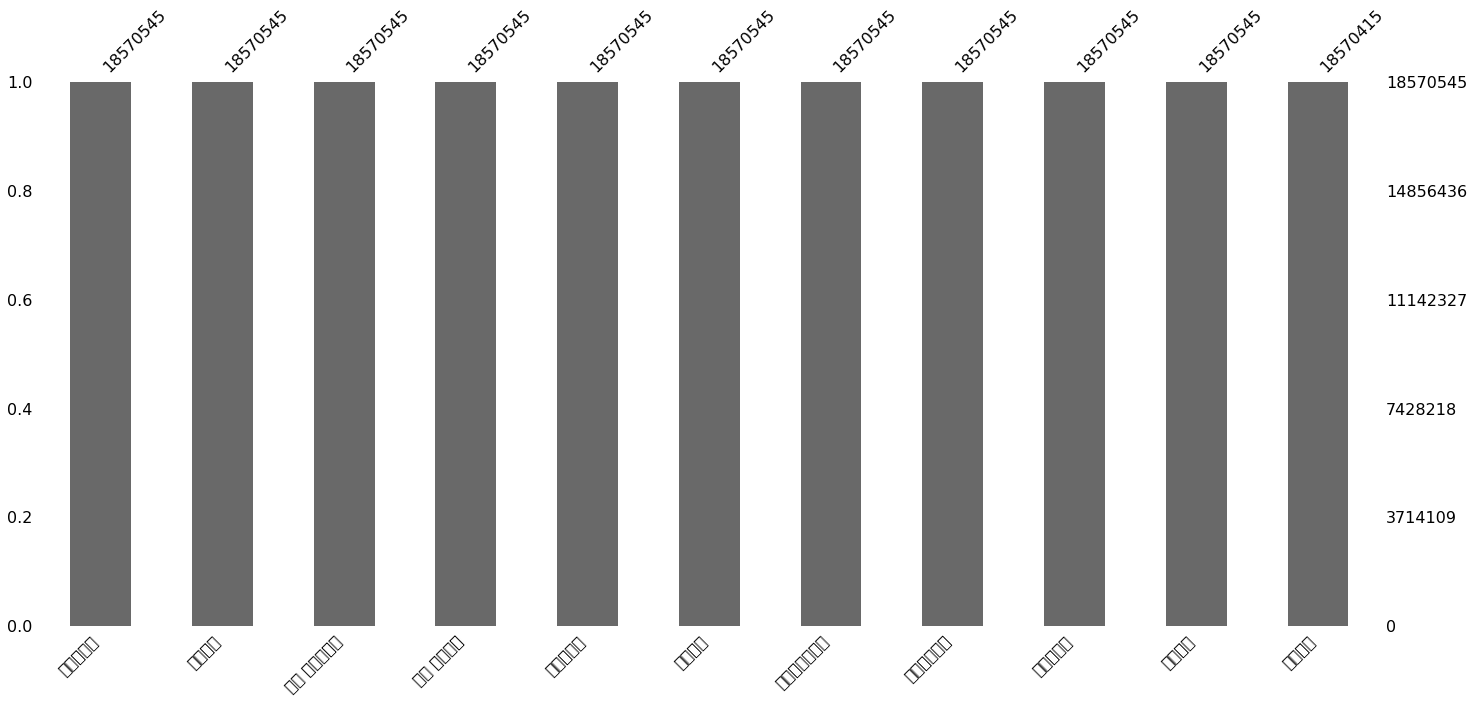

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
msno.bar(df)
plt.show()

**결측치 제거**

In [ ]:
df = df.dropna()
len(df)

18570415

In [ ]:
df['반납대여소번호'] = df['반납대여소번호'].astype(int)

In [ ]:
rent_house_list = set(rent_house["대여소 명"].dropna())
rent_house_num_list = set(rent_house["대여소 번호"].dropna())

In [ ]:
df['대여대여소번호yn'] = df['대여 대여소번호'].isin(rent_house_num_list).astype(str)
df['반납대여소번호yn'] = df['반납대여소번호'].isin(rent_house_num_list).astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570415 entries, 0 to 18570544
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   자전거번호      object 
 1   대여일시       object 
 2   대여 대여소번호   int64  
 3   대여 대여소명    object 
 4   대여거치대      object 
 5   반납일시       object 
 6   반납대여소번호    int64  
 7   반납대여소명     object 
 8   반납거치대      int64  
 9   이용시간       float64
 10  이용거리       float64
 11  대여대여소번호yn  object 
 12  반납대여소번호yn  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ GB


In [ ]:
df = df[df['대여대여소번호yn']== 'True']
df = df[df['반납대여소번호yn']== 'True']

In [ ]:
df[df['반납대여소번호yn']=='False']

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여대여소번호yn,반납대여소번호yn


In [ ]:
df[df['대여대여소번호yn']=='False']

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여대여소번호yn,반납대여소번호yn


In [ ]:
len(df)

18391489

In [ ]:
df['반납대여소명yn'] = df['반납대여소명'].isin(rent_house_list).astype(str)
df['대여대여소명yn'] = df['대여 대여소명'].isin(rent_house_list).astype(str)

In [ ]:
df = df[df['반납대여소명yn']== 'True']
df = df[df['대여대여소명yn']== 'True']

In [ ]:
df = df[['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '반납일시','반납대여소번호','반납대여소명','이용시간', '이용거리']]

In [ ]:
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,SPB-04061,2020-01-01 00:01:04,429,송도병원,2020-01-01 00:04:21,372,약수역 3번출구 뒤,2.0,0.00
1,SPB-06686,2020-01-01 00:02:53,1637,KT 노원점 건물 앞,2020-01-01 00:04:48,1656,중앙하이츠 아파트 입구,1.0,350.00
2,SPB-15937,2020-01-01 00:01:21,1924,삼부르네상스파크빌,2020-01-01 00:05:51,1955,디지털입구 교차로,4.0,800.00
3,SPB-14805,2020-01-01 00:03:12,437,대흥역 1번출구,2020-01-01 00:05:54,126,서강대 후문 옆,2.0,0.00
4,SPB-09038,2020-01-01 00:01:11,1168,마곡엠밸리10단지 앞,2020-01-01 00:05:57,1152,마곡역교차로,4.0,660.00
...,...,...,...,...,...,...,...,...,...
18570540,SPB-32746,2020-12-31 20:36:25,1009,천호역4번출구(현대백화점),2021-01-01 01:52:00,1022,길동 사거리(초소앞),315.0,1869.66
18570541,SPB-30390,2020-12-31 22:51:36,1965,삼환로즈빌아파트 105동 옆,2021-01-01 02:29:15,210,IFC몰,217.0,16245.85
18570542,SPB-50439,2020-12-31 22:56:32,1964,원메디타운 앞,2021-01-01 02:29:32,210,IFC몰,213.0,0.00
18570543,SPB-37080,2020-12-31 22:18:07,130,신촌역(2호선) 7번출구 앞,2021-01-01 02:47:57,148,용강동 주민센터 앞,269.0,1627.36


In [ ]:
len(df)

17776287

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17776287 entries, 0 to 18570544
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   반납일시      object 
 5   반납대여소번호   int64  
 6   반납대여소명    object 
 7   이용시간      float64
 8   이용거리      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.3+ GB


In [ ]:
df['대여 대여소명'].head(30)

0                   송도병원
1            KT 노원점 건물 앞
2              삼부르네상스파크빌
3               대흥역 1번출구
4            마곡엠밸리10단지 앞
5              서울북부고용센터앞
6                 원묵고등학교
7             서울 월드컵 경기장
8           천왕역 1번 출입구 앞
9            영등포구청역 1번출구
10            둔촌역 3번 출입구
11      한국전력공사(동대문 중랑지사)
12            신대방역 2번 출구
13          서울대입구역 마에스트로
14      건대입구역 사거리(롯데백화점)
15    생명의 전화 종합복지관 앞 교차로
16              삼전역 1번출구
17              삼전역 1번출구
18          서울시 도로환경관리센터
19            먹골역 6번출구 앞
20            성북구보건소 건너편
21              노원문화예술회관
22     길음래미안아파트817동 상가 앞
24     종로오가 지하쇼핑센터 14번출구
25             한성대7번출구 앞
26         뚝섬유원지역 1번출구 앞
27            LIGA 아파트 앞
28       잠실나루역 (2번 출구 쪽)
29              가양역 8번출구
30                   수색역
Name: 대여 대여소명, dtype: object

In [ ]:
df.to_csv('cgsdata.csv', index=False, encoding='cp949')

In [ ]:
df = pd.read_csv('/content/cgsdata.csv', encoding='cp949')

In [ ]:
df1 = df['대여 대여소명'].head(30)

In [ ]:
df1

0                   송도병원
1            KT 노원점 건물 앞
2              삼부르네상스파크빌
3               대흥역 1번출구
4            마곡엠밸리10단지 앞
5              서울북부고용센터앞
6                 원묵고등학교
7             서울 월드컵 경기장
8           천왕역 1번 출입구 앞
9            영등포구청역 1번출구
10            둔촌역 3번 출입구
11      한국전력공사(동대문 중랑지사)
12            신대방역 2번 출구
13          서울대입구역 마에스트로
14      건대입구역 사거리(롯데백화점)
15    생명의 전화 종합복지관 앞 교차로
16              삼전역 1번출구
17              삼전역 1번출구
18          서울시 도로환경관리센터
19            먹골역 6번출구 앞
20            성북구보건소 건너편
21              노원문화예술회관
22     길음래미안아파트817동 상가 앞
23     종로오가 지하쇼핑센터 14번출구
24             한성대7번출구 앞
25         뚝섬유원지역 1번출구 앞
26            LIGA 아파트 앞
27       잠실나루역 (2번 출구 쪽)
28              가양역 8번출구
29                   수색역
Name: 대여 대여소명, dtype: object

**2-2 ?, 한자 전처리**

In [ ]:
k = []
for i in range(len(df)):
   if '?' in df['대여 대여소명'][i]:
     k.append(i)
    #  print(i)

In [ ]:
j = []
for i in range(len(df)):
   if '?' in df['반납대여소명'][i]:
     j.append(i)
    #  print(i)

In [ ]:
len(k)

11114

In [ ]:
regex = re.compile('([一-龥])')
p = []
for i in range(len(df)):
  text = df['대여 대여소명'][i]
  matchobj = regex.search(text)
  if str(type(matchobj)) == "<class 're.Match'>":
     p.append(i)


In [ ]:
regex = re.compile('([一-龥])')
o = []
for i in range(len(df)):
  text = df['반납대여소명'][i]
  matchobj = regex.search(text)
  if str(type(matchobj)) == "<class 're.Match'>":
     o.append(i)


In [ ]:
deleteindex= k+j+p+o

In [ ]:
df = df.drop(index=deleteindex, axis=0)

In [ ]:
len(df)

17754376

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/seokjun.csv', encoding='cp949')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17754376 entries, 0 to 17754375
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   반납일시      object 
 5   반납대여소번호   int64  
 6   반납대여소명    object 
 7   이용시간      float64
 8   이용거리      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ GB


In [8]:
df.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

In [9]:
df = df.astype({"이용시간":int, "이용거리":int})

In [10]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,SPB-04061,2020-01-01 00:01:04,429,송도병원,2020-01-01 00:04:21,372,약수역 3번출구 뒤,2,0
1,SPB-06686,2020-01-01 00:02:53,1637,KT 노원점 건물 앞,2020-01-01 00:04:48,1656,중앙하이츠 아파트 입구,1,350
2,SPB-15937,2020-01-01 00:01:21,1924,삼부르네상스파크빌,2020-01-01 00:05:51,1955,디지털입구 교차로,4,800
3,SPB-14805,2020-01-01 00:03:12,437,대흥역 1번출구,2020-01-01 00:05:54,126,서강대 후문 옆,2,0
4,SPB-09038,2020-01-01 00:01:11,1168,마곡엠밸리10단지 앞,2020-01-01 00:05:57,1152,마곡역교차로,4,660


In [32]:
# 대여 대여소 문제 없음
df[['대여 대여소번호','대여 대여소명']].value_counts()

대여 대여소번호  대여 대여소명                
502       뚝섬유원지역 1번출구 앞              106990
207       여의나루역 1번출구 앞               103268
2102      봉림교 교통섬                     67160
152       마포구민체육센터 앞                  66718
2219      고속터미널역 8-1번, 8-2번 출구 사이     54695
                                      ...  
4627      효창공원앞역 5번출구 옆                   6
4604      원효로다목적체육관 앞                     4
4617      동원베네스트 건너편                      3
3703      신성교회 앞                          1
2539      대한무역투자진흥공사 KOTRA 앞              1
Length: 2034, dtype: int64

In [31]:
# 반납 대여소 문제 없음
df[['반납대여소번호','반납대여소명']].value_counts()

반납대여소번호  반납대여소명                 
502      뚝섬유원지역 1번출구 앞              119696
207      여의나루역 1번출구 앞               106022
152      마포구민체육센터 앞                  73678
2102     봉림교 교통섬                     67625
2219     고속터미널역 8-1번, 8-2번 출구 사이     57778
                                     ...  
4616     신용산지하차도 앞                       4
3714     송천센트레빌                          3
3703     신성교회 앞                          2
4602     숙명여대앞 버스정류소 주변                  2
2539     대한무역투자진흥공사 KOTRA 앞              1
Length: 2034, dtype: int64

In [17]:
rent_house = rent_house[rent_house['대여소 번호'].notna()]

In [22]:
rent_house = rent_house.reset_index(drop=True)

In [25]:
rent_house = rent_house.astype({"대여소 번호":int})

In [30]:
rent_house[rent_house["대여소 명"] == "대한무역투자진흥공사 KOTRA 앞"]

,대여소 번호,대여소 명,위치,상세주소,위도,경도,설치 시기,설치 형태,거치 대수,운영 방식
1809,2539,대한무역투자진흥공사 KOTRA 앞,서초구,서초구 헌릉로 13,37.464897,127.044182,2020-02-19,NaN,10,QR


# 결측치 제거 완료 데이터 생성 ( missing_value_drop_data.csv )

In [33]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,SPB-04061,2020-01-01 00:01:04,429,송도병원,2020-01-01 00:04:21,372,약수역 3번출구 뒤,2,0
1,SPB-06686,2020-01-01 00:02:53,1637,KT 노원점 건물 앞,2020-01-01 00:04:48,1656,중앙하이츠 아파트 입구,1,350
2,SPB-15937,2020-01-01 00:01:21,1924,삼부르네상스파크빌,2020-01-01 00:05:51,1955,디지털입구 교차로,4,800
3,SPB-14805,2020-01-01 00:03:12,437,대흥역 1번출구,2020-01-01 00:05:54,126,서강대 후문 옆,2,0
4,SPB-09038,2020-01-01 00:01:11,1168,마곡엠밸리10단지 앞,2020-01-01 00:05:57,1152,마곡역교차로,4,660


In [35]:
df.to_csv('/content/gdrive/MyDrive/missing_value_drop_data.csv',index=False, encoding="cp949")

In [37]:
rent_house.to_csv("/content/gdrive/MyDrive/rent_house.csv",index=False, encoding="cp949")